In [29]:
import numpy as np
import pymc3 as pm
import arviz as az

In [8]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigmin1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

In [9]:
model.basic_RVs

[mu ~ Normal, obs ~ Normal]

In [10]:
model.free_RVs

[mu ~ Normal]

In [11]:
model.observed_RVs

[obs ~ Normal]

In [12]:
model.logp({"mu": 0})

array(-135.88006481)

In [13]:
model

In [52]:
with pm.Model() as model_L:
    dincl_max = 45
    dincl = pm.Uniform('dincl', lower=0, upper=dincl_max)
    inclinatiion = pm.Uniform('inclination', lower=0, upper=90)
    Lx1 = pm.Exponential('Lx1', lam=0.5)
    
    idata = pm.sample(1000)

<ipython-input-52-0005205d2125>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  idata = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Lx2, Lx1, inclination, dincl]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [53]:
model_L

/home/x1/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'dincl'}>,
        <AxesSubplot:title={'center':'dincl'}>],
       [<AxesSubplot:title={'center':'inclination'}>,
        <AxesSubplot:title={'center':'inclination'}>],
       [<AxesSubplot:title={'center':'Lx1'}>,
        <AxesSubplot:title={'center':'Lx1'}>],
       [<AxesSubplot:title={'center':'Lx2'}>,
        <AxesSubplot:title={'center':'Lx2'}>]], dtype=object)

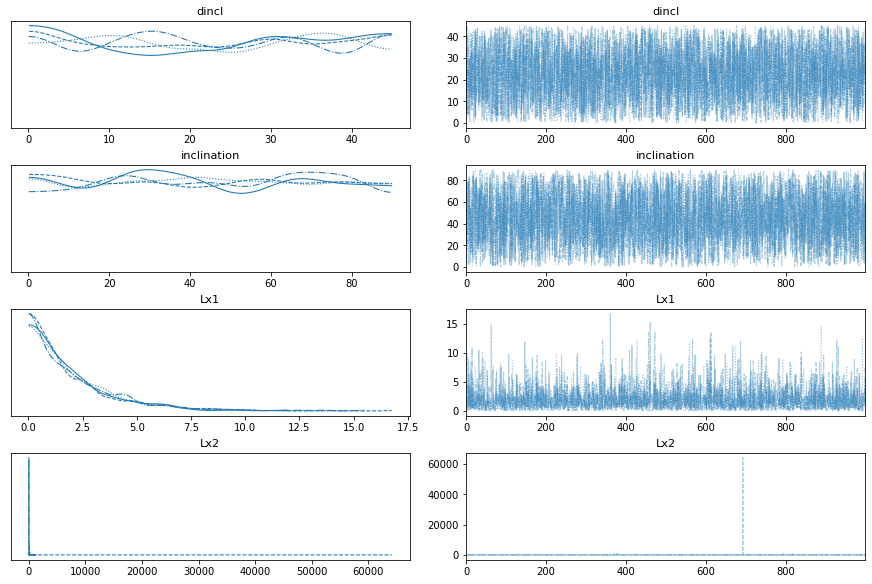

In [54]:
az.plot_trace(idata)